## Observations and Insights 

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)

study_results_df = pd.DataFrame(study_results)

mice_merged_df = pd.merge(mouse_metadata_df,study_results_df, on = "Mouse ID" , how = "inner")
mice_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
total_mice = len(mice_merged_df['Mouse ID'].unique())
total_mice

249

In [33]:
duplicate_count = mice_merged_df[mice_merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicate_count


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
duplicate_count = mice_merged_df[mice_merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicate_count


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
study_results_drop = study_results_df.drop_duplicates(subset = ['Mouse ID','Timepoint'])
study_results_drop

mice_merged_clean_df = pd.merge(mouse_metadata_df,study_results_drop, on = "Mouse ID" , how = "inner")
mice_merged_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
total_mice = len(mice_merged_df['Mouse ID'].unique())
total_mice

249

## Summary Statistics

In [37]:
def sem(array):
    return np.std(array) / np.sqrt(np.size(array))


In [39]:
drug_stats_summary = mice_merged_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean,np.std,np.median,np.var,sem])
drug_stats_summary.head()

,mean,std,median,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.328629
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.468499
Infubinol,52.884795,6.567243,51.820584,43.128684,0.490851
Ketapril,55.235638,8.279709,53.698743,68.553577,0.602252
Naftisol,54.331565,8.134708,52.509285,66.173479,0.594860


## Bar and Pie Charts

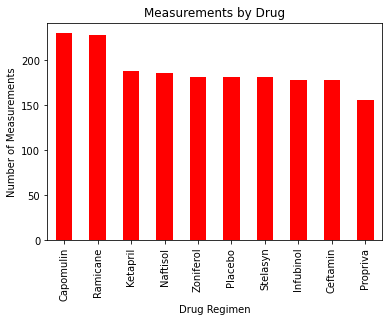

<Figure size 432x288 with 0 Axes>

In [40]:
drug_totals = mice_merged_clean_df['Drug Regimen'].value_counts()
drug_totals.plot(kind="bar",facecolor='red')

plt.title("Measurements by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Measurements')

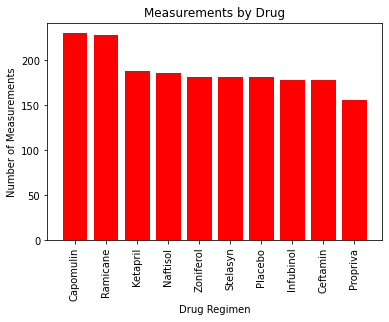

In [41]:
drug_names = mice_merged_clean_df['Drug Regimen'].unique()
DrugNames = drug_names
DrugTotals = drug_totals
x_axis = np.arange(len(DrugTotals))
plt.bar(x_axis, DrugTotals, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, DrugNames,rotation='vertical')
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol','Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.title("Measurements by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

In [42]:
mice_sex = mice_merged_clean_df.groupby(['Mouse ID'])['Sex'].unique()
mice_sex_df = pd.DataFrame(mice_sex)
mice_sex_df.head()

,Sex
Mouse ID,
a203,[Female]
a251,[Female]
a262,[Female]
a275,[Female]
a366,[Female]


Text(0.5, 1.0, 'Female/Male Distribution')

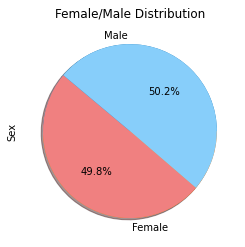

In [54]:
sex_totals = mice_merged_clean_df['Sex'].value_counts()
sex_totals.plot(kind="pie", title=("Female/Male Distribution"))

colors = ["lightcoral","lightskyblue"]
plt.pie(sizes,colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female/Male Distribution") 

Text(0.5, 1.0, 'Female/Male Distribution')

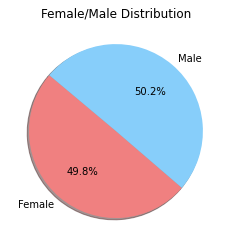

In [44]:
female_count = len(mice_sex_df.loc[mice_sex_df["Sex"] == "Female", :])
female_count

male_count = len(mice_sex_df.loc[mice_sex_df["Sex"] == "Male", :])
male_count

sizes = [female_count,male_count]
sizes

# colors = ["red", "orange", "lightcoral", "lightskyblue"]
labels = ["Female", "Male"]
colors = ["lightcoral","lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female/Male Distribution")       


## Quartiles, Outliers and Boxplots

In [45]:
gtp = mice_merged_df.groupby("Mouse ID")
max_tumors = pd.merge(mice_merged_df, gtp["Timepoint"].max(), how='inner', on=["Mouse ID", "Timepoint"])
max_tumors


treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

quartiles = max_tumors["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Across all treatments, values below {lower_bound} could be outliers.")
print(f"Across all treatments, values above {upper_bound} could be outliers.")

some_max_tumors = max_tumors.loc[(max_tumors["Drug Regimen"] == "Capomulin") | (max_tumors["Drug Regimen"] == "Ramicane") |
                                        (max_tumors["Drug Regimen"] == "Infubinol") | (max_tumors["Drug Regimen"] == "Ceftamin") ,
                                      ["Drug Regimen","Tumor Volume (mm3)"]]
some_max_tumors

smtgb = some_max_tumors.groupby("Drug Regimen")
lower_quants = smtgb["Tumor Volume (mm3)"].quantile(.25)
upper_quants = smtgb["Tumor Volume (mm3)"].quantile(.75)
iqrs = upper_quants - lower_quants

lw_bnds = lower_quants - (1.5*iqrs)
up_bnds = upper_quants + (1.5*iqrs)
up_bnds,lw_bnds

low_outliers = []
high_outliers = []
all_outliers = []

for treatment in treatments:
    low_outliers.append(some_max_tumors.loc[(some_max_tumors["Drug Regimen"]==treatment) &
                                            (some_max_tumors["Tumor Volume (mm3)"]< lw_bnds.loc[treatment])])
    high_outliers.append(some_max_tumors.loc[(some_max_tumors["Drug Regimen"]==treatment) &
                                            (some_max_tumors["Tumor Volume (mm3)"]> up_bnds.loc[treatment])])
    
for df in high_outliers + low_outliers:
        if not df.empty:
            all_outliers.append(df)
            
print(f"For the 4 treatments of interest, outliers are:")
all_outliers[0]

Across all treatments, values below 17.400437649999986 could be outliers.
Across all treatments, values above 93.49183637000002 could be outliers.
For the 4 treatments of interest, outliers are:


,Drug Regimen,Tumor Volume (mm3)
74,Infubinol,36.321346


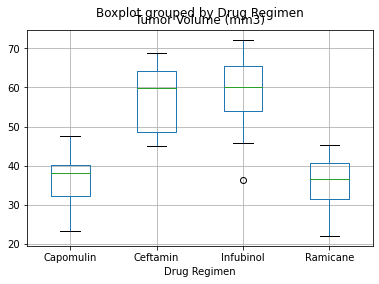

In [17]:
some_max_tumors.boxplot("Tumor Volume (mm3)","Drug Regimen")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

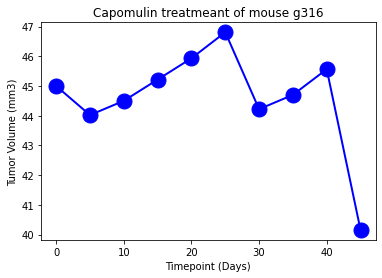

In [47]:
capomulin = mice_merged_clean_df.loc[(mice_merged_clean_df["Drug Regimen"] == "Capomulin"),["Mouse ID","Tumor Volume (mm3)", "Timepoint"]]
capomulin

capomulin_df = pd.DataFrame(capomulin)
capomulin_df
 
cap_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "g316",:]
cap_df

x_axis = cap_df["Timepoint"]
tumor_vol = cap_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse g316')
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=15,marker="o",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



In [48]:
cap_df

,Mouse ID,Tumor Volume (mm3),Timepoint
351,g316,45.000000,0
352,g316,44.022752,5
353,g316,44.502042,10
354,g316,45.216743,15
355,g316,45.933322,20
356,g316,46.809225,25
357,g316,44.221480,30
358,g316,44.702833,35
359,g316,45.565821,40
360,g316,40.159220,45


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume: for Capomulin Regimen')

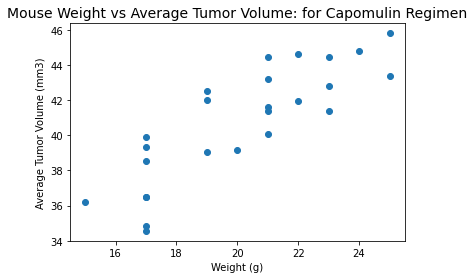

In [49]:
capomulin2 = mice_merged_clean_df.loc[(mice_merged_clean_df["Drug Regimen"] == "Capomulin"),["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
capomulin2

capomulin_2_df = pd.DataFrame(capomulin2)
capomulin_2_df
capavg = capomulin_2_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume: for Capomulin Regimen',fontsize =14)

## Correlation and Regression

In [50]:
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

lin=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
lin

The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume: for Capomulin Regimen')

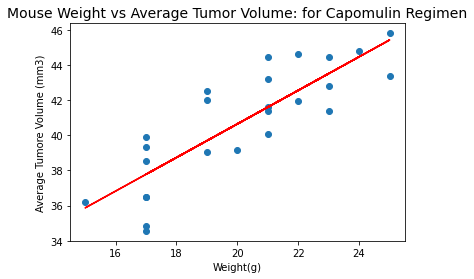

In [51]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = capavg['Weight (g)']*slope+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume: for Capomulin Regimen',fontsize =14)